In [1]:
import pandas as pd
import os
import sklearn
import numpy as np
import matplotlib.pyplot as plt
from sklearn.gaussian_process import GaussianProcessRegressor
import sklearn.gaussian_process.kernels as k
import seaborn as sns
import warnings
warnings.filterwarnings('ignore')
pd.set_option('display.max_rows', None)


In [2]:
os.getcwd()

'C:\\Users\\User\\Documents\\GitHub\\Hypertension_prediction\\Hypertension(regularly sampled data)\\Codebase(previous paper codes)\\Hypertension_code_amy'

In [3]:
#df = pd.read_excel (r'Mappings.xlsx')
p9690 =pd.read_csv (r'./Output/missing_value_imputed/p9690_missing.csv')#,parse_dates=['Timestamp'], index_col=['Timestamp'])
p9630 =pd.read_csv (r'./Output/missing_value_imputed/p9630_missing.csv')#, parse_dates=['Timestamp'], index_col=['Timestamp'])
p9888 =pd.read_csv (r'./Output/missing_value_imputed/p9888_missing.csv')#, parse_dates=['Timestamp'], index_col=['Timestamp'])
p10049=pd.read_csv (r'./Output/missing_value_imputed/p10049_missing.csv')#, parse_dates=['Timestamp'], index_col=['Timestamp'])
p10412=pd.read_csv (r'./Output/missing_value_imputed/p10412_missing.csv')#, parse_dates=['Timestamp'], index_col=['Timestamp'])

In [4]:
#!git clone https://github.com/caow13/BRITS.git

In [5]:
#from sklearn.impute import KNNImputer
#p10049_knn_imputed = p10049.copy(deep=True)
#knn_imp = KNNImputer(n_neighbors=3)
#p10049_knn_imputed.loc[:, :] = knn_imp.fit_transform(p10049_knn_imputed)


first create patient train test set

In [6]:
p10049['Timestamp'] = pd.to_datetime(p10049['Timestamp'])
p10049['DOB'] = pd.to_datetime(p10049['DOB'])
p10049.set_index('Timestamp', inplace=True)

In [7]:
p10049.dtypes

UserID               float64
Systolic             float64
Diastolic            float64
Heart Rate           float64
DOB           datetime64[ns]
Weight               float64
Height               float64
Gender                object
dtype: object

In [8]:
p10049_s= p10049['Systolic']
p10049_d= p10049['Diastolic']
p10049_hr= p10049['Heart Rate']
p10049_all= p10049[['Systolic','Diastolic','Heart Rate']]
p10049_s_train,p10049_s_test= np.split(p10049_s, [int(.7 *len(p9690))])
p10049_d_train,p10049_d_test= np.split(p10049_d, [int(.7 *len(p9690))])
p10049_hr_train,p10049_hr_test= np.split(p10049_hr, [int(.7 *len(p9690))])
p10049_all_train,p10049_all_test= np.split(p10049_all, [int(.7 *len(p9690))])



interpolation

In [9]:
df_poly_imputed = p10049_all.interpolate(method='polynomial', order=5)
df_time_imputed = p10049_all.interpolate(method='time')
df_spline_imputed = p10049_all.interpolate(method='spline', order=5)
df_barycentric_imputed = p10049_all.interpolate(method='barycentric', order=2)


KNN Inputation

In [10]:
# Imputing with KNNImputer

from sklearn.impute import KNNImputer
from sklearn.preprocessing import MinMaxScaler

#Define a subset of the dataset
df_knn = p10049_all.copy()
#p9690.filter(['Systolic','Diastolic','Heart Rate'], axis=1).copy()


# Define scaler to set values between 0 and 1

scaler = MinMaxScaler(feature_range=(0, 1))
df_knn = pd.DataFrame(scaler.fit_transform(df_knn), columns = df_knn.columns)

# Define KNN imputer and fill missing values
knn_imputer = KNNImputer(n_neighbors=5, weights='uniform', metric='nan_euclidean')
df_knn_imputed = pd.DataFrame(knn_imputer.fit_transform(df_knn), columns=df_knn.columns)


Multivariate Imputation by Chained Equations (MICE)

In [11]:
from sklearn.experimental import enable_iterative_imputer
from sklearn.impute import IterativeImputer
from sklearn import linear_model

df_mice = p10049_all.copy()

# Define MICE Imputer and fill missing values
mice_imputer = IterativeImputer(estimator=linear_model.BayesianRidge(), n_nearest_features=None, imputation_order='ascending')
df_mice_imputed = pd.DataFrame(mice_imputer.fit_transform(df_mice), columns=df_mice.columns)

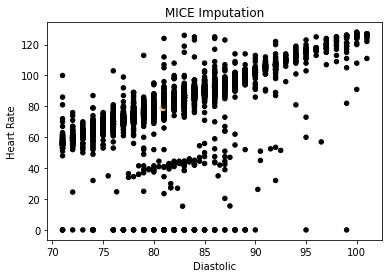

In [12]:
fig = plt.Figure()
null_values = p10049_all['Systolic'].isnull() 
fig = df_mice_imputed.plot(x='Diastolic', y='Heart Rate', kind='scatter', c=null_values, cmap='copper', title='MICE Imputation', colorbar=False)
#https://towardsdatascience.com/imputing-missing-data-with-simple-and-advanced-techniques-f5c7b157fb87#:~:text=Time%20Series%20Imputation&text=One%20way%20to%20impute%20missing,with%20the%20previously%20observed%20value

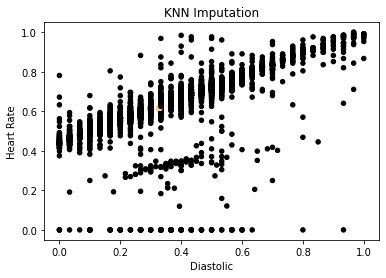

In [13]:
fig = plt.Figure()
null_values = p10049_all['Systolic'].isnull() 
fig = df_knn_imputed.plot(x='Diastolic', y='Heart Rate', kind='scatter', c=null_values, cmap='copper', title='KNN Imputation', colorbar=False)


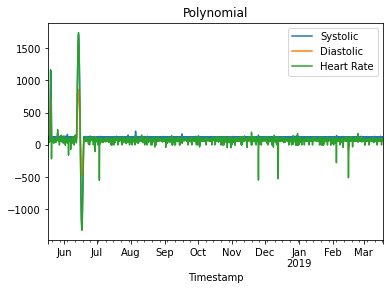

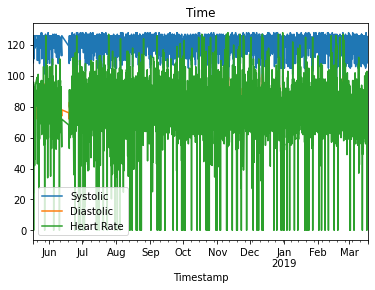

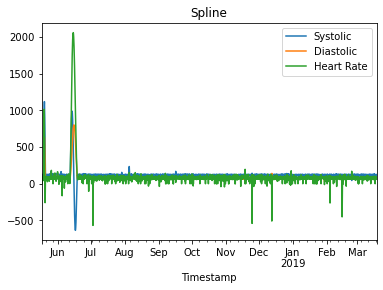

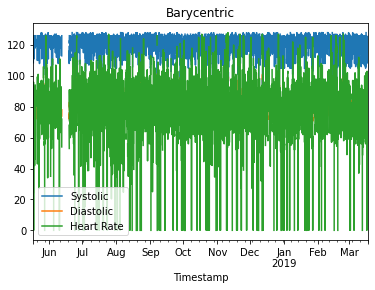

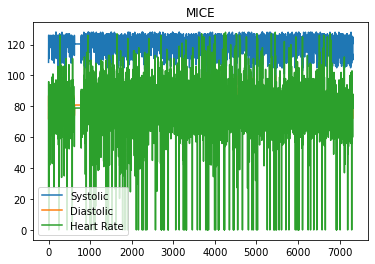

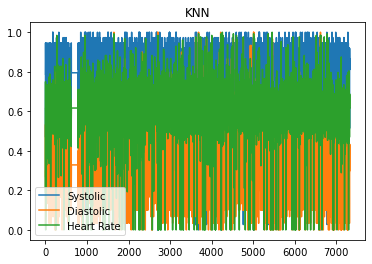

In [14]:
figsize=(40,15)
df_poly_imputed.plot(title='Polynomial')
df_time_imputed.plot(title='Time')
df_spline_imputed.plot(title='Spline')
df_barycentric_imputed.plot(title='Barycentric')
df_mice_imputed.plot(title='MICE')
df_knn_imputed.plot(title='KNN')
lines, labels = plt.gca().get_legend_handles_labels()
#labels = ['linear', 'time' ,'spline','barycentric']
plt.legend(lines, labels, loc='best')

In [15]:
#df_mice_imputed_train,df_mice_imputed_test= np.split(df_mice_imputed, [int(.7 *len(df_mice_imputed))])


In [16]:
from pycaret.anomaly import *


In [17]:
s = setup(df_time_imputed, use_gpu=True, session_id=2)


IntProgress(value=0, description='Processing: ', max=3)

,,
,,
Initiated,. . . . . . . . . . . . . . . . . .,17:04:08
Status,. . . . . . . . . . . . . . . . . .,Preparing Data for Modeling


ValueError: Setting a random_state has no effect since shuffle is False. You should leave random_state to its default (None), or set shuffle=True.

In [ ]:
#from scipy.linalg import pinv2

#print("Done.")

In [ ]:
iforest = create_model('iforest')
print(iforest)

In [ ]:
svm = create_model('svm')
print(svm)

In [ ]:
knn= create_model('knn')
print(knn)

In [ ]:
#models()


In [ ]:
plot_model(iforest, plot = 'tsne')

In [ ]:
plot_model(svm, plot = 'tsne')

In [ ]:
plot_model(knn, plot = 'tsne')

In [ ]:
plot_model(iforest, plot = 'umap')

In [ ]:
plot_model(svm, plot = 'umap')

In [ ]:
plot_model(knn, plot = 'umap')

In [ ]:
iforest_result = assign_model(iforest)
iforest_result

In [ ]:
knn_result = assign_model(knn)
knn_result

In [ ]:
svm_result = assign_model(svm)
svm_result

In [ ]:
iforest_anomaly=iforest_result[iforest_result['Anomaly']==1]
iforest_anomaly.shape

In [ ]:
knn_anomaly=knn_result[knn_result['Anomaly']==1]
knn_anomaly.shape

In [ ]:
svm_anomaly=svm_result[svm_result['Anomaly']==1]
svm_anomaly.shape

In [ ]:
from yellowbrick.features import Manifold
dfr = iforest_result['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df_time_imputed, dfr)
viz.show()

In [ ]:
from yellowbrick.features import Manifold
dfr = knn_result['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df_time_imputed, dfr)
viz.show()

In [ ]:
from yellowbrick.features import Manifold
dfr = svm_result['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df_time_imputed, dfr)
viz.show()

In [ ]:
predictions = predict_model(iforest, data = df_poly_imputed)
predictions
from yellowbrick.features import Manifold
dfr = predictions['Anomaly']
viz = Manifold(manifold="tsne")
viz.fit_transform(df_time_imputed, dfr)
viz.show()

In [ ]:
#save_model(iforest, 'iforest_pipeline')
#loaded_model = load_model('iforest_pipeline')
#print(loaded_model)